<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/MACD_Stochastic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
pip install yfinance

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
%matplotlib inline

In [45]:
df = pd.read_csv("AAPL.csv", index_col=0, parse_dates=True)
df.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1.158750,1.160714,1.143393,1.150000,0.985970,278588800
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.968976,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.978928,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.987501,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.988267,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.060224,2227450400


In [46]:
df.tail(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500
2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.919998,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,172.000000,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,172.169998,86580100


In [47]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [48]:
df.tail(6)

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-12-31,178.089996,179.229996,177.259995,177.570007,177.570007,64025500,4.699999,5.022983
2022-01-03,177.830002,182.880005,177.710007,182.009995,182.009995,104487900,4.818780,4.982143
2022-01-04,182.630005,182.940002,179.119995,179.699997,179.699997,99310400,4.672654,4.920245
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.919998,94537600,4.123607,4.760917
2022-01-06,172.699997,175.300003,171.639999,172.000000,172.000000,96904000,3.413516,4.491437
2022-01-07,172.889999,174.139999,171.029999,172.169998,172.169998,86580100,2.831837,4.159517


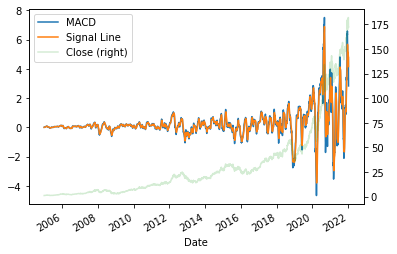

In [49]:
fig, ax = plt.subplots()
df[['MACD', 'Signal Line']].plot(ax=ax)
df[['Close']].plot(ax=ax, alpha=0.2, secondary_y=True)
plt.show();